seaborn의 기본 동작은 평균과 평균 주위의 95% 신뢰 구간을 플로팅하여 각 값에서 여러 측정값을 집계하는 것입니다 .

In [3]:
import seaborn as sns
fmri = sns.load_dataset("fmri")


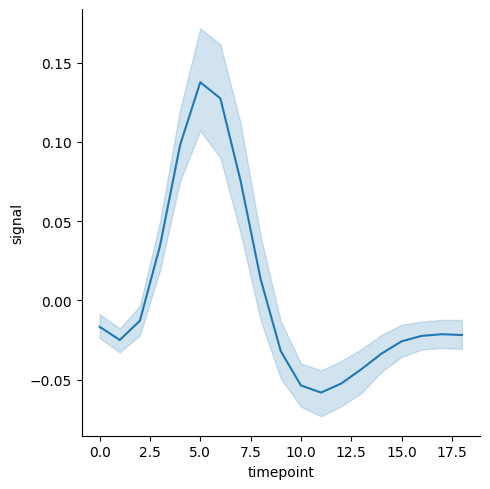

In [4]:
sns.relplot(data=fmri,x="timepoint",y='signal',kind='line');

신뢰 구간은 부트스트래핑을 사용하여 계산되며, 이는 더 큰 데이터 세트의 경우 시간이 많이 소요될 수 있습니다. 따라서 다음과 같이 비활성화할 수 있습니다.



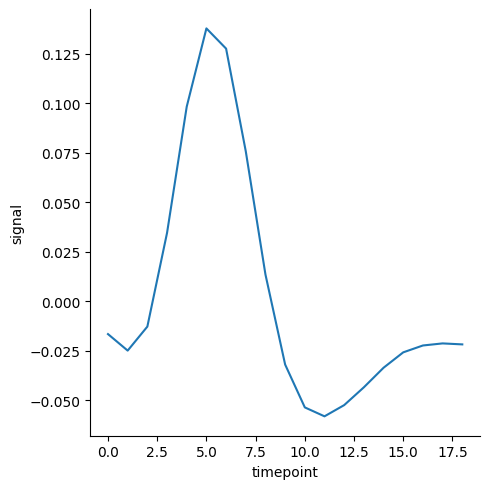

In [5]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal", errorbar=None,)

특히 더 큰 데이터의 경우 또 다른 좋은 옵션은 신뢰 구간 대신 표준 편차를 플로팅하여 각 시점에서 분포의 확산을 나타내는 것입니다.

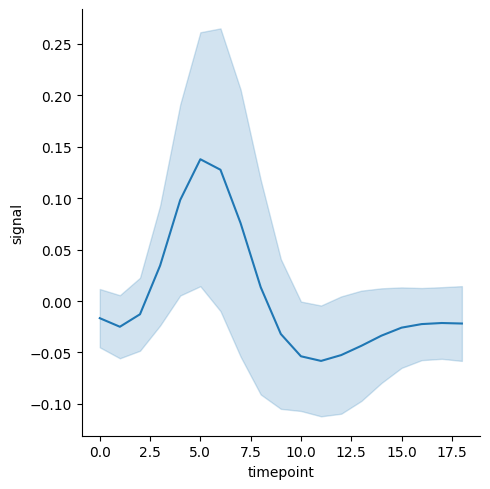

In [6]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",)

집계를 모두 끄려면 estimator매개변수를 로 설정하십시오. None데이터에 각 지점에서 여러 관찰이 있는 경우 이상한 효과가 발생할 수 있습니다.

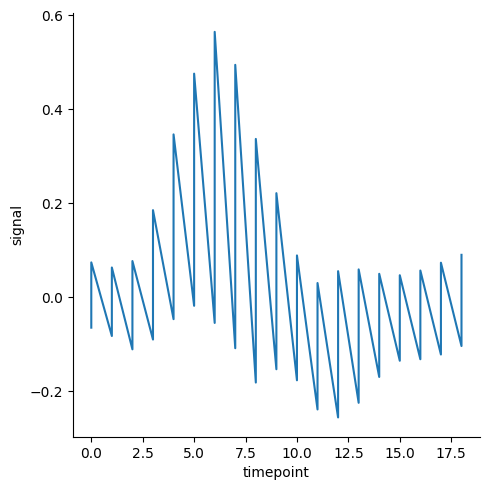

In [7]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,)

# Plotting subsets of data with semantic mappings

이 lineplot()함수는 다음과 같은 유연성을 제공합니다 scatterplot(). 플롯 요소의 색조, 크기 및 스타일을 수정하여 최대 3개의 추가 변수를 표시할 수 있습니다. 와 동일한 API를 사용하여 그렇게 합니다 scatterplot(). 즉, matplotlib에서 선과 점의 모양을 제어하는 ​​매개변수에 대해 멈추고 생각할 필요가 없습니다.



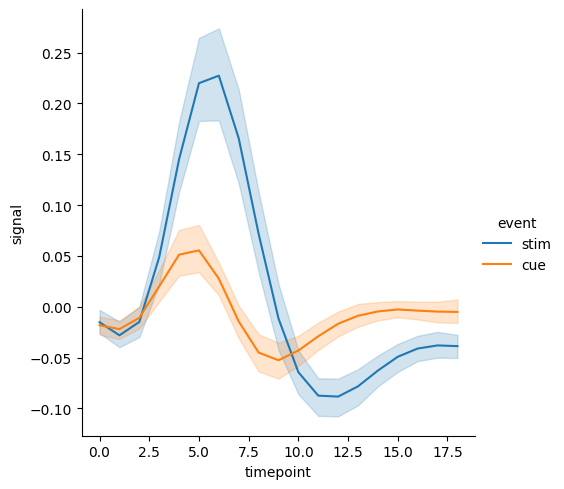

In [8]:
sns.relplot(data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",)

라인 플롯에 스타일 시맨틱을 추가하면 기본적으로 라인의 대시 패턴이 변경됩니다.

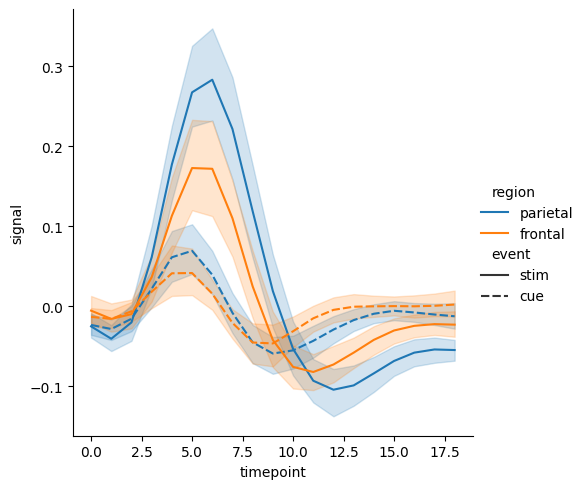

In [9]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal",hue="region", style="event",);

그러나 대시와 함께 또는 대신에 각 관찰에서 사용된 마커로 하위 집합을 식별할 수 있습니다.

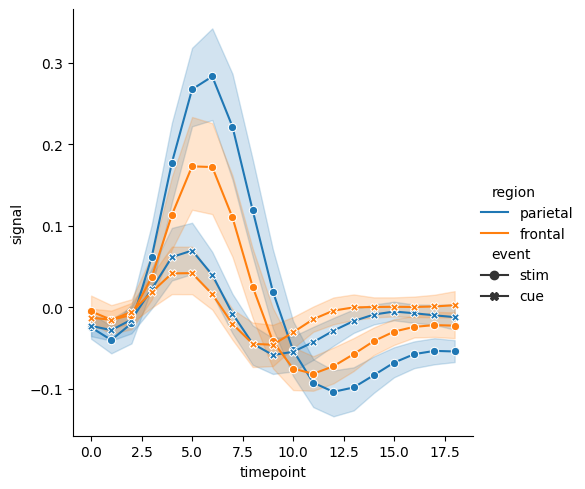

In [10]:
sns.relplot(data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True)

산점도와 마찬가지로 여러 의미 체계를 사용하여 선 그림을 만들 때는 주의해야 합니다. 때로는 유익하지만 구문 분석하고 해석하기 어려울 수도 있습니다. 그러나 하나의 추가 변수에 대한 변경 사항만 검사하는 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있습니다. 이렇게 하면 흑백으로 인쇄하거나 색맹인 사람이 볼 때 플롯에 더 쉽게 접근할 수 있습니다.

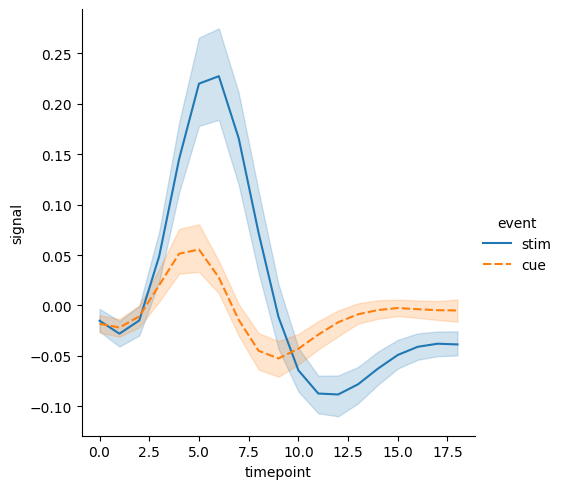

In [11]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",)

반복 측정 데이터로 작업하는 경우(즉, 여러 번 샘플링된 단위가 있는 경우) 시맨틱을 통해 구분하지 않고 각 샘플링 단위를 개별적으로 그릴 수도 있습니다. 이렇게 하면 범례가 복잡해지는 것을 방지할 수 있습니다.

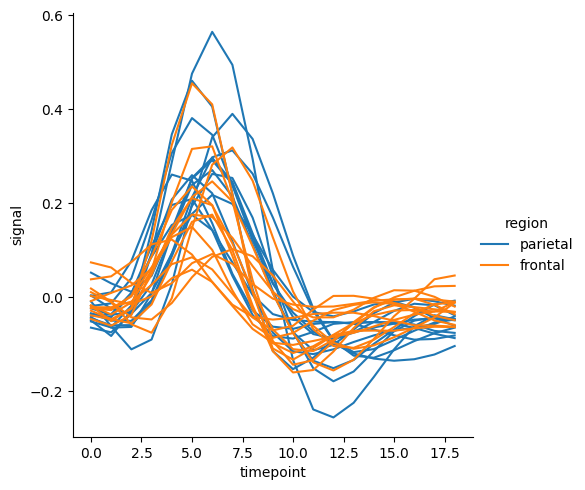

In [12]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,)

기본 컬러맵과 범례 처리는 lineplot()색조 의미 체계가 범주형인지 숫자형인지에 따라 달라집니다.

In [13]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


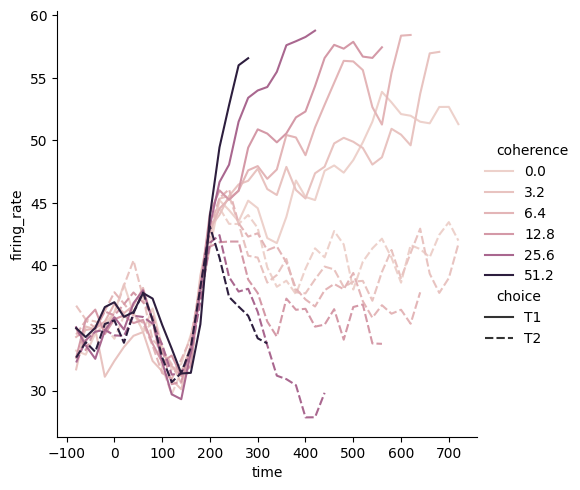

In [14]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
);

hue변수가 숫자인 경우에도 선형 색상 스케일로 제대로 표현되지 않을 수 있습니다 . 변수 의 수준이 대수적으로 조정되는 경우입니다 hue. 목록이나 사전을 전달하여 각 줄에 특정 색상 값을 제공할 수 있습니다.

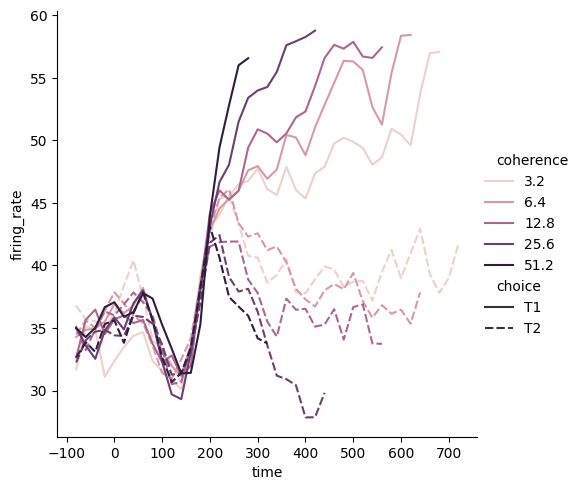

In [15]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(data=dots.query("coherence > 0"), kind="line",x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
);

세 번째 의미인 크기는 줄의 너비를 변경합니다.

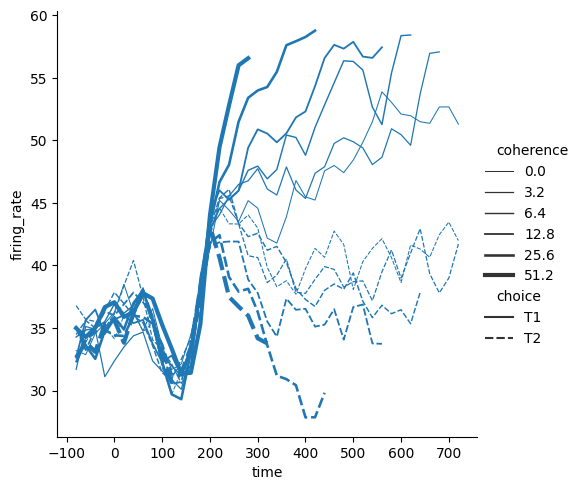

In [16]:
sns.relplot(data=dots, kind="line",x="time", y="firing_rate",size="coherence", style="choice");

변수는 일반적으로 숫자 이지만 size범주형 변수를 선 너비와 매핑할 수도 있습니다. "굵은" 선과 "가는" 선보다 훨씬 더 구분하기 어렵기 때문에 그렇게 할 때 주의하십시오. 그러나 선의 변동 빈도가 높은 경우 대시를 인식하기 어려울 수 있으므로 이 경우 다른 폭을 사용하는 것이 더 효과적일 수 있습니다.

In [17]:
from matplotlib.colors import LogNorm
palette= sns.cubehelix_palette(light=.8, n_colors=6)
palette

[[0.9072879094300372, 0.7554704536803714, 0.7462376322879748],
 [0.8285819344135655, 0.5939685136446344, 0.6506580690069503],
 [0.7112429433992273, 0.44706244471928347, 0.582154114273226],
 [0.5475925095088021, 0.3183394743439307, 0.5067755143579389],
 [0.3615667891876727, 0.2135460683528729, 0.39972110388915943],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

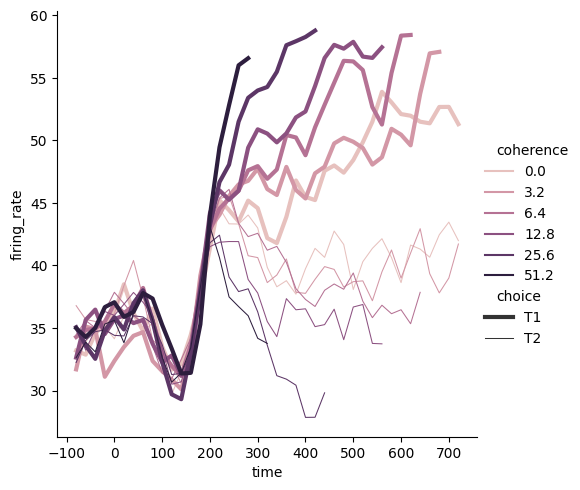

In [18]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

# Controlling sorting and orientation

사용자가 의 함수로 lineplot()가장 자주 그리려고 한다고 가정하기 때문에 기본 동작은 플로팅하기 전에 값 별로 데이터를 정렬하는 것입니다 . 그러나 다음과 같이 비활성화할 수 있습니다

In [19]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
healthexp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
268,2020,Canada,5828.324,81.7
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4


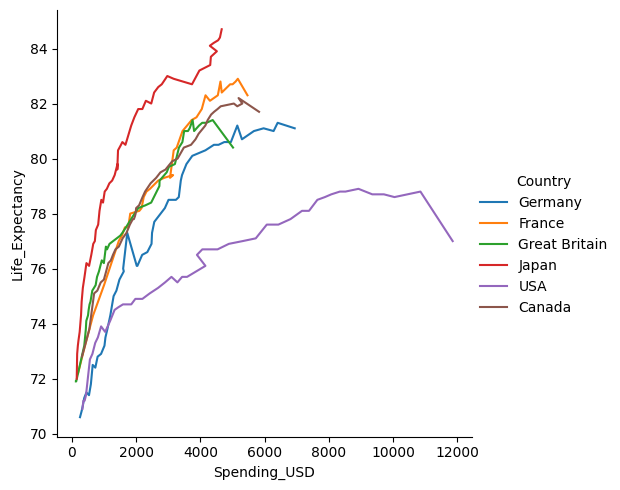

In [20]:
sns.relplot(data=healthexp, kind="line",x="Spending_USD", y="Life_Expectancy", hue="Country",sort=False);

y축을 따라 정렬(및 집계)하는 것도 가능합니다.



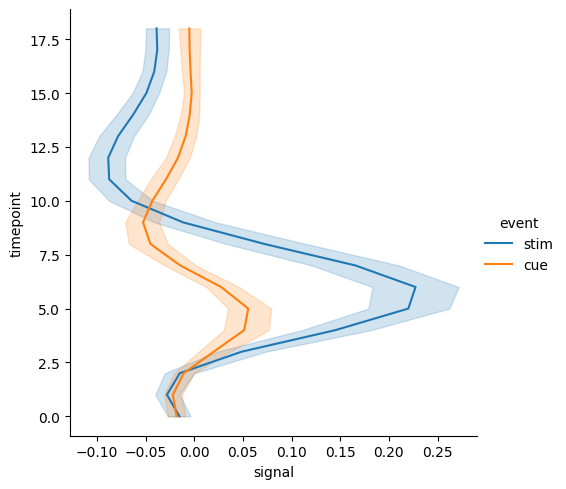

In [21]:
sns.relplot(data=fmri, kind="line",x="signal", y="timepoint", hue="event",orient="y",);